In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

using CSV, DelimitedFiles, DataFrames

In [2]:
splg_methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    #"iid LS",
    "ST JL-LS",
    # "ST LS",
]

# simulation parameters
n_batch = 6 # maximum batch size considered
n_rep = 3 # number of runs

3

## Combinatorial Laplacian with random graphs

ER graph

$q=0.1$

In [18]:
rng = Random.default_rng()

# connection graph parameters

n = 2000
p = 0.01
eta = 0.

# regularization parameter
q = 0.1 #0.001 good one


# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)


# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# # saving plot
name = "precond"*"ER"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
Plots.savefig("figures/"*name*".pdf")


cond nb of Laplacian: 7.392194308452984e16
k = 

401 vs nb edges= 19854
 
k = 

401 vs nb edges= 19854
 
method: DPP(K) unifmethod: 

DPP(K) JL-LS

InterruptException: InterruptException:

$q= 0.001$

cond nb of Laplacian: 36763.899705059055
k = 

402 vs nb edges= 20183
 
k = 

402 vs nb edges= 20183
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

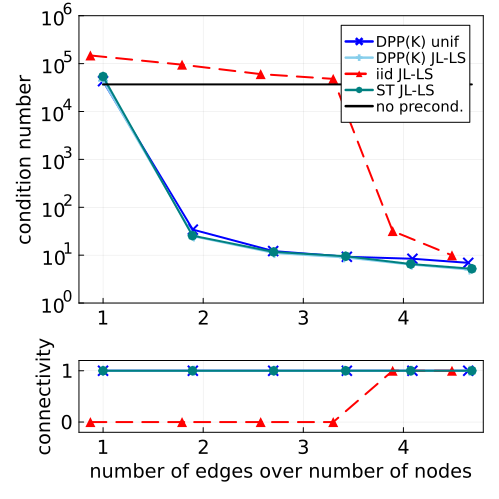

ST JL-LS

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondERn2000p0.01eta0.0q0.001.pdf"

In [19]:
rng = Random.default_rng()

# connection graph parameters

n = 2000
p = 0.01
eta = 0.

# regularization parameter
q = 0.001 


# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)


# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# # saving plot
name = "precond"*"ER"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
Plots.savefig("figures/"*name*".pdf")


In [7]:
using PlotlyJS
name = "nb_roots_ER"*string(q)

#q = 0.001
q = 0.1
nb_samples = 200
nb_roots = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)

    # check nb roots and cycles
    # cycles = get_prop(mtsf, :cycle_nodes)
    # nb_cycles[i_sample] = length(cycles)
    nb_roots[i_sample] = length(get_prop(mtsf, :roots))
end    

In [8]:
name = "nb_roots_ER"*string(q)

#labels = string.(sort(unique(Int.(nb_roots))))
cat_nb_roots = string.(sort(Int.(nb_roots)))
trace = PlotlyJS.histogram(x=cat_nb_roots, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(p,"figures/"*name*".pdf")

"figures/nb_roots_ER0.1.pdf"

 SBM graph

## Magnetic Laplacian with random graphs

MUN graph model

cond nb of Laplacian: 801.4513734758522
k = 

397 vs nb edges= 19628
 
k = 

397 vs nb edges= 19628
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

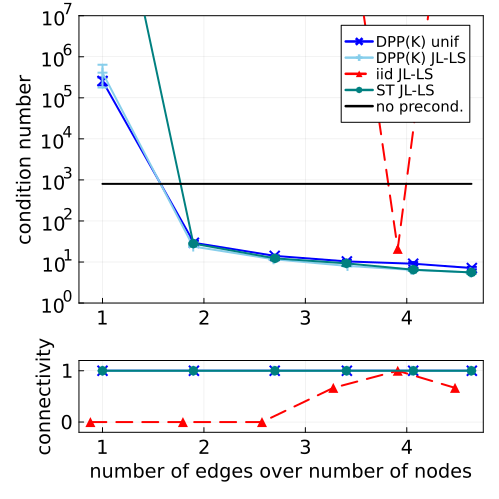

ST JL-LS

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondMUNn2000p0.01eta0.1q0.pdf"

In [38]:
type = "MUN" 

rng = Random.default_rng()

# connection graph parameters
n = 2000#100
p = 0.01#0.9
eta = 1e-1#1e-3

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
meta_g = MetaGraph(n)

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,splg_methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e7)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# # saving plot
Plots.savefig("figures/"*name*".pdf")


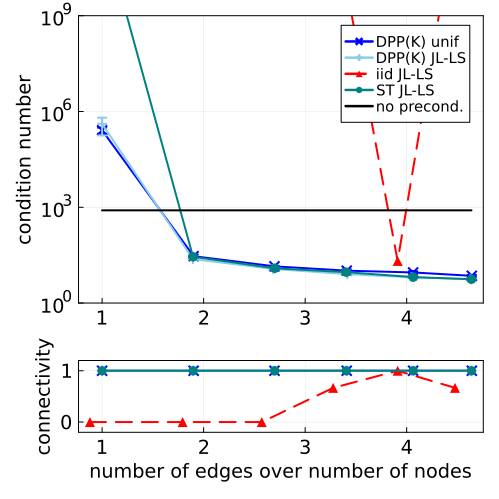

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondMUNn2000p0.01eta0.1q0.pdf"

In [39]:
# plotting
y_limits = (1,1e9)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# # saving plot
Plots.savefig("figures/"*name*".pdf")

In [12]:
nb_samples = 200
nb_cycles = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
end    


name = "nb_cycles_MUN_precond_"*type*string(eta)

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(p,"figures/"*name*".pdf")


"figures/nb_cycles_MUN_precond_MUN0.001.pdf"

ERO graph model

least eigenvalue of Laplacian: 0.0005811063627036751
k = 

397 vs nb edges= 19891
 
k = 

397 vs nb edges= 19891
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

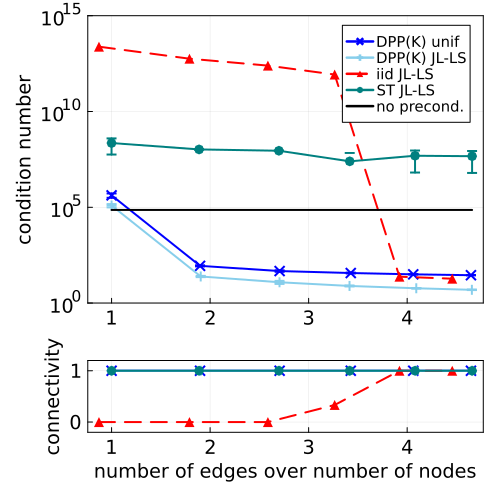

ST JL-LS

GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


In [39]:
type = "ERO" 

rng = Random.default_rng()

# connection graph parameters
n = 2000 # 100
p = 0.01 #0.9
eta =  1e-4 # 1e-3

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
meta_g = MetaGraph(n)

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,splg_methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# # saving plot
y_limits = (1,1e15)

name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# Plots.savefig("figures/"*name*".pdf")

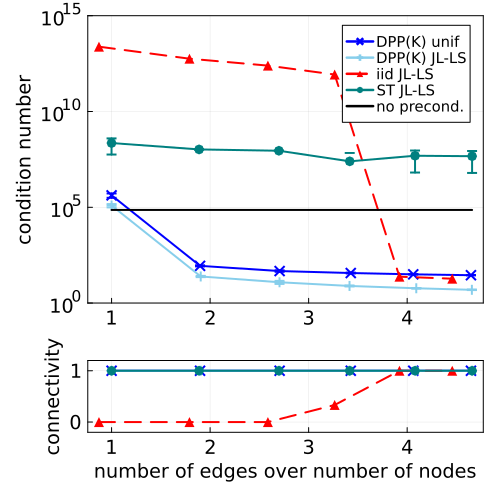

GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondEROn2000p0.01eta0.0001q0.pdf"

In [40]:
# # saving plot
y_limits = (1,1e15)

name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

Plots.savefig("figures/"*name*".pdf")

In [15]:
nb_samples = 200
nb_cycles = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)

    # check nb roots and cycles
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
    #nb_roots[i_sample] = length(get_prop(mtsf, :roots))
end    


name = "nb_cycles_"*type*string(eta)

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(p,"figures/"*name*".pdf")


InterruptException: InterruptException:

## Combinatorial Laplacian with a real graph


In [2]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using GraphIO 
using ParserCombinator 

In [4]:
real_g = "polblogs.gml"
g = loadgraph(real_g, "digraph", GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

rng = Random.default_rng()

# select largest connected component
temp = connected_components(g)
g = g[temp[1]]

meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

MersenneTwister(0x1802b973fb63aed024fb35f3ebeb6936)

least eigenvalue of Laplacian: 0.009999999999999586
k = 

393 vs nb edges= 16717
 
k = 

393 vs nb edges= 16717
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

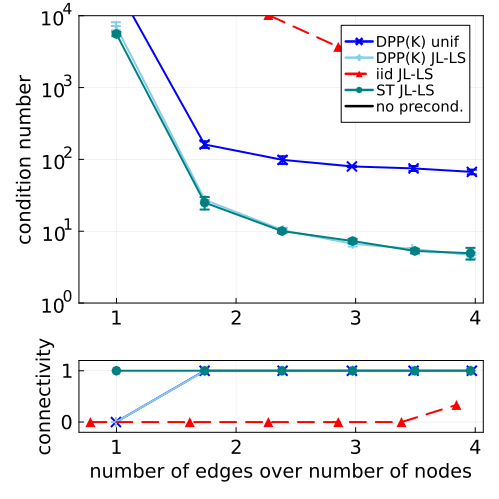

ST JL-LS

UndefVarError: UndefVarError: savefig not defined

In [44]:
# regularization parameter
q = 0.01

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)
name = "precond_PolBlogs_"*"q"*string(q)

# saving results
#save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e4)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# saving plot
Plots.savefig("figures/"*name*".pdf")

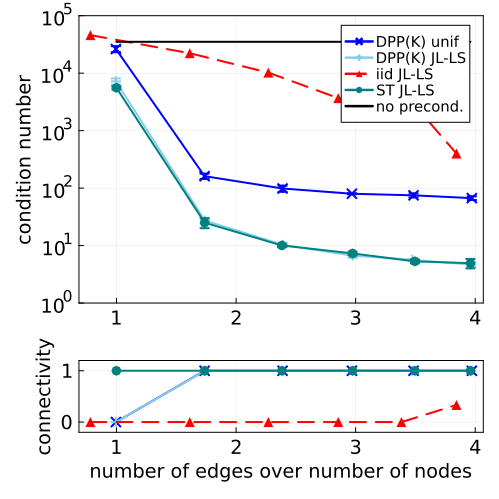

In [45]:
# # plotting
y_limits = (1,1e5)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)
# Plots.savefig("figures/"*name*".pdf")

In [6]:
function main_component(g)
    c = connected_components(g)
    _, i = findmax(length.(c))
    g[c[i]]
end

main_component (generic function with 1 method)

## Epinions

In [10]:
list = readdlm("soc-Epinions1.txt")
mist = list .+ 1 # s.t. indices start at 1

list_tuple = Array(tuple.(eachcol(Int.(list))...))
e_list = Edge.(list_tuple)
meta_g = SimpleGraphFromIterator(e_list)

meta_g = main_component(meta_g)
meta_g = SimpleGraph(meta_g)
n = nv(meta_g)
m = ne(meta_g)
println("n= ",n)
println("m= ",m)

n= 75869
m= 405057


### MUN Epinions

In [11]:
rng = Random.default_rng()
# select largest connected component

model = :mun
eta = 0.05
planted_score = randperm(rng,n)

meta_g = MetaGraph(meta_g)
for e in edges(meta_g)
    u = src(e)
    v = dst(e)
    h_u = planted_score[u]
    h_v = planted_score[v]
    θ = (h_u - h_v) * π / (n - 1)
    if (model === :ero) && (rand(rng) < eta) # Erdos-Renyi Outliers
        θ = rand(rng, (-n + 1):(n - 1)) * π / (n - 1)
    elseif model === :mun # Multiplicative Uniform Noise
        θ *= 1.0 + eta * 2 * (rand(rng) - 0.5)
    end
    set_prop!(meta_g, e, :angle, θ)
end



using PlotlyJS

n_rep = 100
time_crsf = zeros(n_rep)
time_st = zeros(n_rep)

q = 0                    
absorbing_node = true
ust = true
weighted = false

# warm up (precompilation)
vec_crsf = @timed multi_type_spanning_forest(rng, meta_g, q)
vec_st = @timed multi_type_spanning_forest(rng, meta_g, q; weighted, absorbing_node, ust)

for i_rep = 1:n_rep
    vec_crsf = @timed multi_type_spanning_forest(rng, meta_g, q)
    vec_st = @timed multi_type_spanning_forest(rng, meta_g, q; weighted, absorbing_node, ust)
    time_crsf[i_rep] = vec_crsf[2]
    time_st[i_rep] = vec_st[2]
end

println([mean(time_crsf) mean(time_st)])
trace_crsf = box(y=time_crsf,

quartilemethod="linear",
name="CRSF",
boxmean=true)


trace_st = box(y=time_st,
quartilemethod="linear",
name="ST",
boxmean=true)

layout = Layout(
    autosize=false,
    width=500,
    height=500,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=20,
    boxmode="group",
    showlegend=false
)
plt_MUN = PlotlyJS.plot([trace_crsf, trace_st],layout)

name = "MUN_time_epinions_"*"eta"*string(eta)*"q"*string(q)
PlotlyJS.savefig(plt_MUN,"figures/"*name*".pdf")

[0.34564543286999994 0.48150769731]


"figures/MUN_time_epinions_eta0.05q0.pdf"

### MUN Epinions precond

cond nb of Laplacian: 538569.2380527047
method: DPP(K) unifmethod: 

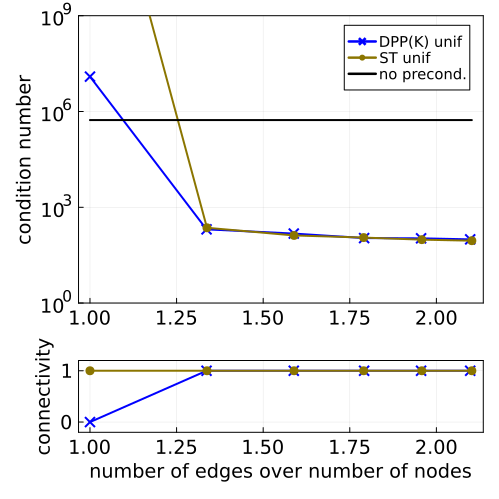

ST unif

In [50]:

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

splg_methods = [
    "DPP(K) unif",
    # "DPP(K) JL-LS",
    #"DPP(K) LS"
    # "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
    # "ST JL-LS"
    "ST unif",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)

eta = eta 
name = "MUN_precond_epinions_"*"eta"*string(eta)*"q"*string(q)

# plotting
y_limits = (1,1e9)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# saving plot
# Plots.savefig("figures/"*name*".pdf")

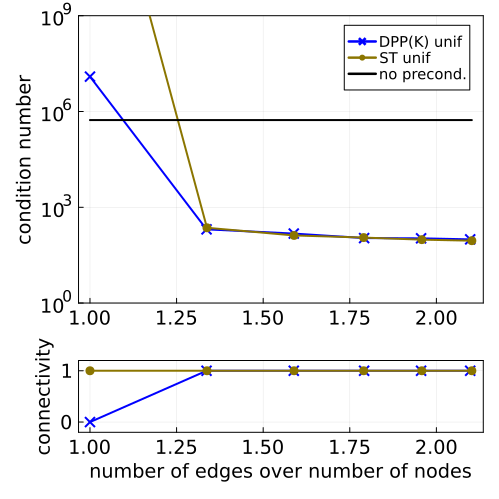

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/MUN_precond_epinions_eta0.05q0.pdf"

In [51]:
# saving plot
y_limits = (1,1e9)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)
Plots.savefig("figures/"*name*".pdf")

### ERO Epinions

In [12]:
rng = Random.default_rng()
# select largest connected component

model = :ero
eta = 2*1e-5
planted_score = randperm(rng,n)

meta_g = MetaGraph(meta_g)
for e in edges(meta_g)
    u = src(e)
    v = dst(e)
    h_u = planted_score[u]
    h_v = planted_score[v]
    θ = (h_u - h_v) * π / (n - 1)
    if (model === :ero) && (rand(rng) < eta) # Erdos-Renyi Outliers
        θ = rand(rng, (-n + 1):(n - 1)) * π / (n - 1)
    elseif model === :mun # Multiplicative Uniform Noise
        θ *= 1.0 + eta * 2 * (rand(rng) - 0.5)
    end
    set_prop!(meta_g, e, :angle, θ)
end


using PlotlyJS

n_rep = 100
time_crsf = zeros(n_rep)
time_st = zeros(n_rep)

q = 0                    
absorbing_node = true
ust = true
weighted = false

# warm up
vec_crsf = @timed multi_type_spanning_forest(rng, meta_g, q)
vec_st = @timed multi_type_spanning_forest(rng, meta_g, q; weighted, absorbing_node, ust)

for i_rep = 1:n_rep
    vec_crsf = @timed multi_type_spanning_forest(rng, meta_g, q)
    vec_st = @timed multi_type_spanning_forest(rng, meta_g, q; weighted, absorbing_node, ust)
    time_crsf[i_rep] = vec_crsf[2]
    time_st[i_rep] = vec_st[2]
end

trace_crsf = box(y=time_crsf,
quartilemethod="linear",
name="CRSF",
boxmean=true)


trace_st = box(y=time_st,
quartilemethod="linear",
name="ST",
boxmean=true)

layout = Layout(
    autosize=false,
    width=500,
    height=500,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=20,
    boxmode="group",
    showlegend=false
)
plt_ERO =PlotlyJS.plot([trace_crsf, trace_st],layout)

name = "ERO_time_epinions_"*"eta"*string(eta)*"q"*string(q)
PlotlyJS.savefig(plt_ERO,"figures/"*name*".pdf")

println([mean(time_crsf) mean(time_st)])


[0.57220849704 0.6542919440100001]


### ERO Epinions precond

cond nb of Laplacian: 1.0497319355336212e7
method: DPP(K) unifmethod: 

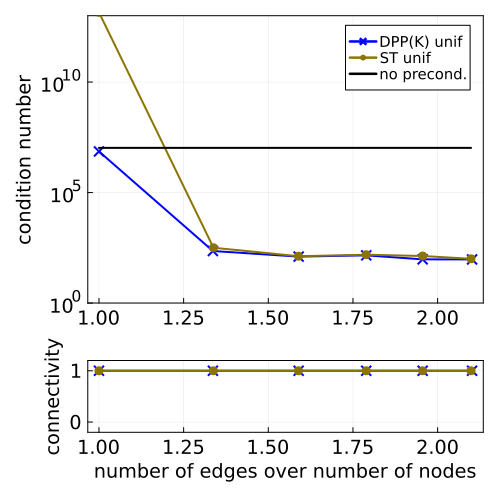

ST unif

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/ERO_precond_epinions_eta2.0e-5q0.pdf"

In [48]:
# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

splg_methods = [
    "DPP(K) unif",
    # "DPP(K) JL-LS",
    #"DPP(K) LS"
    # "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
    # "ST JL-LS"
    "ST unif",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)
name = "ERO_precond_epinions_"*"eta"*string(eta)*"q"*string(q)

y_limits = (1,1e13)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# saving plot
Plots.savefig("figures/"*name*".pdf")

## pokec

In [55]:
list = readdlm("soc-pokec-relationships.txt")
mist = list .+ 1 # s.t. indices start at 1

list_tuple = Array(tuple.(eachcol(Int.(list))...))
e_list = Edge.(list_tuple)
meta_g = SimpleGraphFromIterator(e_list)

meta_g = main_component(meta_g)
meta_g = SimpleGraph(meta_g)
n = nv(meta_g)
m = ne(meta_g)
println("n= ",n)
println("m= ",m)

n= 1632803
m= 22301964


In [56]:
rng = Random.default_rng()
# select largest connected component

model = :mun
eta = 0.05
planted_score = randperm(rng,n)

meta_g = MetaGraph(meta_g)
for e in edges(meta_g)
    u = src(e)
    v = dst(e)
    h_u = planted_score[u]
    h_v = planted_score[v]
    θ = (h_u - h_v) * π / (n - 1)
    if (model === :ero) && (rand(rng) < eta) # Erdos-Renyi Outliers
        θ = rand(rng, (-n + 1):(n - 1)) * π / (n - 1)
    elseif model === :mun # Multiplicative Uniform Noise
        θ *= 1.0 + eta * 2 * (rand(rng) - 0.5)
    end
    set_prop!(meta_g, e, :angle, θ)
end


using PlotlyJS

n_rep = 3
time_crsf = zeros(n_rep)
time_st = zeros(n_rep)

q = 0                    
absorbing_node = true
ust = true
weighted = false

# warm up
vec_crsf = @timed multi_type_spanning_forest(rng, meta_g, q)
vec_st = @timed multi_type_spanning_forest(rng, meta_g, q; weighted, absorbing_node, ust)

for i_rep = 1:n_rep
    vec_crsf = @timed multi_type_spanning_forest(rng, meta_g, q)
    vec_st = @timed multi_type_spanning_forest(rng, meta_g, q; weighted, absorbing_node, ust)
    time_crsf[i_rep] = vec_crsf[2]
    time_st[i_rep] = vec_st[2]
end

trace_crsf = box(y=time_crsf,
quartilemethod="linear",
name="CRSF",
boxmean=true)


trace_st = box(y=time_st,
quartilemethod="linear",
name="ST",
boxmean=true)

layout = Layout(
    autosize=false,
    width=500,
    height=500,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=20,
    boxmode="group"
)
plt_pokec =PlotlyJS.plot([trace_crsf, trace_st],layout)

eta = eta 
name = "ERO_time_epinions_"*"eta"*string(eta)*"q"*string(q)
# PlotlyJS.savefig(plt_pokec,"figures/"*name*".pdf")

println([mean(time_crsf) mean(time_st)])


In [38]:


# simulation parameters
n_batch = 3 # maximum number of batches considered
n_rep = 1 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

splg_methods = [
    "DPP(K) unif",
    # "DPP(K) JL-LS",
    #"DPP(K) LS"
    # "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
    # "ST JL-LS"
    "ST unif",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)
name = "MUN_precond_epinions_"*"q"*string(q)

# plotting
y_limits = (1,1e9)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# saving plot
# Plots.savefig("figures/"*name*".pdf")

InterruptException: InterruptException: